In [1]:
print("importing modules")
import torch

import utilities
print("done")

BATCH_SIZE = 2048

importing modules
done


Load the MNIST data

In [2]:

data_dict = torch.load("MNIST_images_size_10000")

images = data_dict["images"]
labels = data_dict["labels"]

C:\Users\Josh\AppData\Local\Temp\ipykernel_32184\2940320133.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load("MNIST_images_size_10000")


In [3]:
images.size()
labels.size()

torch.Size([10000])

In [4]:

#Now filter numbers

filtered_images_list = [[] for _ in range(10)]
filtered_labels = [f"{i}" for i in range(10)]
i = 0
for image,label in zip(images,labels):
    i +=1
    filtered_images_list[int(label)].append(image)
 
print(i)
filtered_images = []
for list in filtered_images_list:
    imgs = torch.stack(list)
    filtered_images.append(imgs)



10000


Preform SVD decomposition on the noisy data and the recentered data

In [5]:
single_svds = [ utilities.get_SVD_vals(single_digits) for single_digits in filtered_images]

In [6]:
osvds = utilities.get_SVD_vals(images)

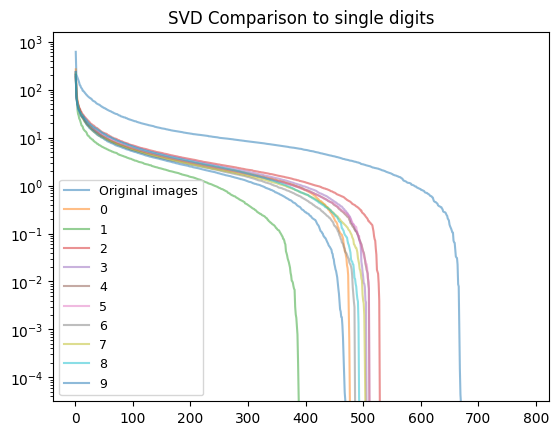

In [10]:
utilities.graph_SVDs([osvds] + single_svds, ["Original images"] + filtered_labels,title="SVD Comparison to single digits", legend_font_size = 9)

In [8]:

var_explained = lambda S: S**2 / sum(S**2)


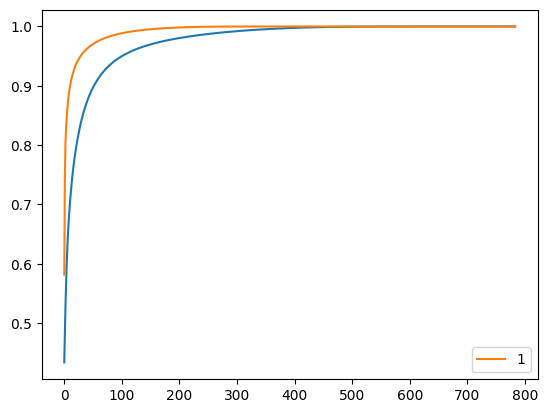

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(var_explained(osvds)))
plt.plot(np.cumsum(var_explained(single_svds[1])), label = "1")
plt.legend()